In [2]:
import wfdb
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np

In [69]:
# Load the record and annotation
record = wfdb.rdrecord('data/mit-bih-malignant-ventricular-ectopy-database-1.0.0/418')     # reads from 418.hea and 418.dat
annotation = wfdb.rdann('data/mit-bih-malignant-ventricular-ectopy-database-1.0.0/418', 'atr')  # reads from 418.atr

In [70]:
# Extract key info
fs = record.fs  # sampling frequency
signal = record.p_signal  # shape: (num_samples, 2)
aux_notes = [note.replace('\x00', '').lstrip('(') for note in annotation.aux_note]
sample_indices = annotation.sample  # where each annotation occurs

In [ ]:
# Segment parameters
segment_duration = 8  # seconds
samples_per_segment = int(fs * segment_duration)
total_segments = signal.shape[0] // samples_per_segment

In [78]:
total_segments

262

In [84]:
# Initialize
segments = []
labels = []

for i in range(total_segments):
    start = i * samples_per_segment
    end = start + samples_per_segment
    segment = signal[start:end, :]

    labels_in_segment = [
        aux_notes[j].strip().upper()
        for j in range(len(sample_indices))
        if start <= sample_indices[j] < end and aux_notes[j].strip() != ''
    ]

    if any('VT' in note for note in labels_in_segment):
        label = 0
    elif any('VF' in note for note in labels_in_segment):
        label = 1
    else:
        continue

    segments.append(segment)
    labels.append(label)

In [92]:
segments = []
labels = []

last_label = None

for i in range(total_segments):
    start = i * samples_per_segment
    end = start + samples_per_segment
    segment = signal[start:end, :]

    # Find annotation(s) in this segment
    labels_in_segment = [
        aux_notes[j].strip().upper()
        for j in range(len(sample_indices))
        if start <= sample_indices[j] < end and aux_notes[j].strip() != ''
    ]

    if labels_in_segment:
        # Update known rhythm
        last_label = labels_in_segment[0]  # or most common
        label = last_label
    elif last_label is not None:
        # Inherit the previous rhythm
        label = last_label
    else:
        # No known rhythm yet (e.g., early in record)
        label = 'UNKNOWN'

    segments.append(segment)
    labels.append(label)


In [93]:
# Convert to NumPy arrays
segments = np.array(segments)  # shape: (num_valid_segments, 2000, 2)
labels = np.array(labels)      # shape: (num_valid_segments,)

In [94]:
record_id = '418'  # Record ID for saving
np.save(f'{record_id}_segments.npy', segments)
np.save(f'{record_id}_labels.npy', labels)

print(f"Processed {record_id}: {len(segments)} labeled segments saved.")

Processed 418: 262 labeled segments saved.


In [96]:
labels

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'VFL', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'VFL', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'VFL',
       'N', 'N', 'VFL', 'N', 'N', 'N', 'N', 'VFL', 'VFL', 'VFL', 'VFL',
       'VFL', 'VFL', 'VFL', 'VFL', 'VFL', 'VFL', 'VFL', 'VFL', 'N', 'VFL',
       'N', 'N', 'VFL', 'VFL', 'VFL', 'VFL', 'VFL', 'VFL', 'VFL', 'VFL',
       'VFL', 'N', 'N', 'N', 'N', 'N', 'N', 'VFL', 'N', 'VFL', 'VFL',
       'VFL', 'VFL', 'VFL', 'VFL', 'VFL', 'VFL', 'VFL', 'VFL', 'VFL',
       'VFL', 'VFL', 'N', 'VFL', 'VFL', 'VFL', 'VFL', 'N', 'VFL', 'N',
       'N', 'VFL', 'N', 'N', 'N', 'N', 'VFL', 'N', 'N', 'N', 'N', 'N',
       'VFL', 'VFL', 'N', 'N', 'N', 'VFL', 'VFL', 'N', 'N', 'VFL'

In [98]:
record_ids = ['418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '602', '605', '607', '609', '610', '611', '612', '614', '615']
print(len(record_ids))

22


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:

# --- Parameters ---
record_id = '418'  # change as needed
data_dir = 'processed_data'
fs = 250  # sampling frequency
segment_duration_sec = 8
time_axis = np.linspace(0, segment_duration_sec, fs * segment_duration_sec)

# --- Load Data ---
segments = np.load(os.path.join(data_dir, f'{record_id}_segments.npy'))
labels = np.load(os.path.join(data_dir, f'{record_id}_labels.npy'), allow_pickle=True)

print(f"Loaded {len(segments)} segments for record {record_id}")

# --- Plot Function ---
def plot_segment(index, channel=0):
    if index >= len(segments):
        print("Index out of range.")
        return
    segment = segments[index]
    label = labels[index]
    
    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, segment[:, channel])
    plt.title(f"Record {record_id} - Segment {index} - Label: {label} - Channel {channel}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (mV)")
    plt.grid()
    plt.show()


Loaded 262 segments for record 418


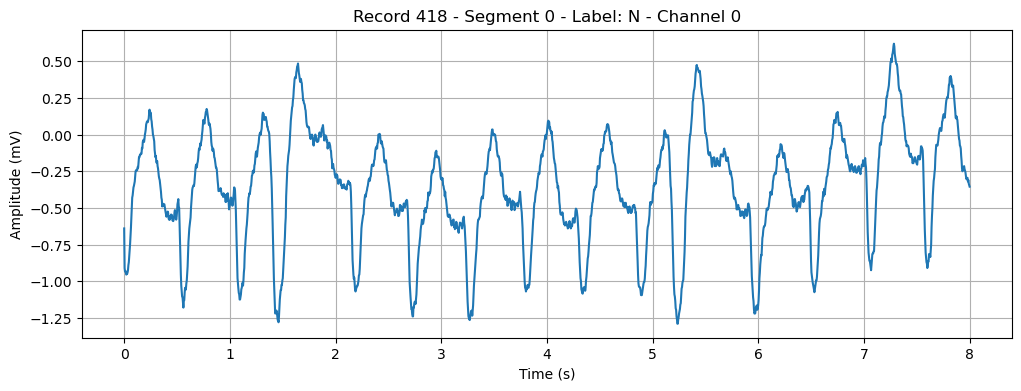

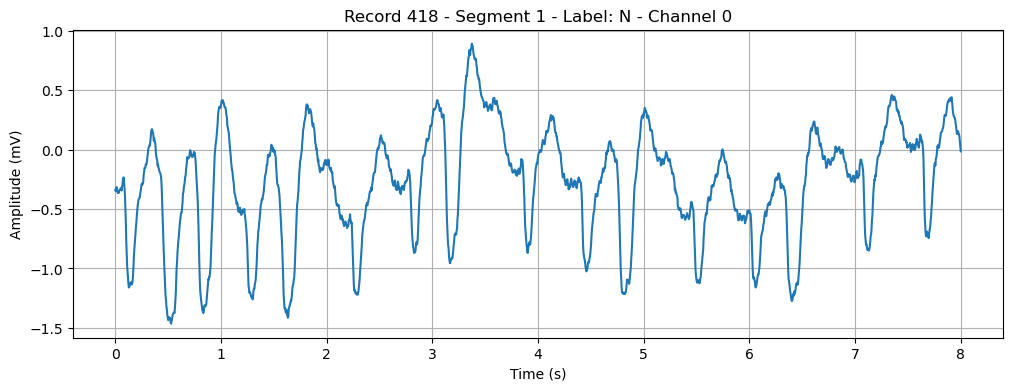

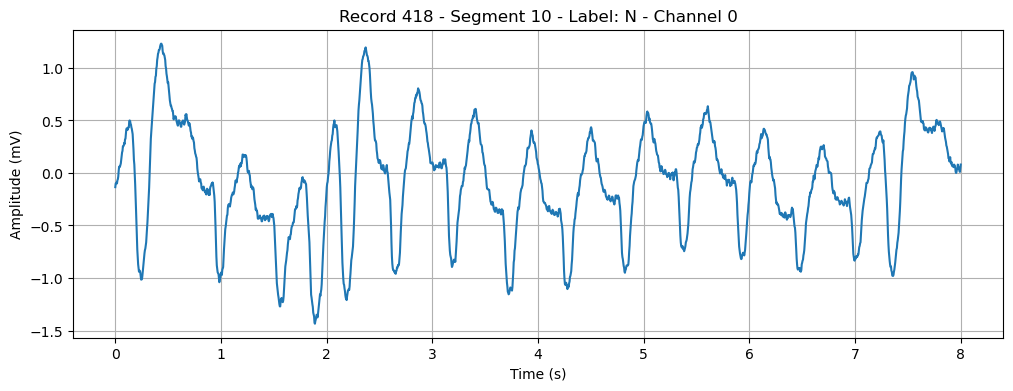

In [3]:

# --- Plot Examples ---
plot_segment(0)
plot_segment(1)
plot_segment(10)


In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models

# --- Load Data ---
record_id = '418'
X = np.load(f'processed_data/{record_id}_segments.npy')
y = np.load(f'processed_data/{record_id}_labels.npy', allow_pickle=True)

# --- Encode Labels ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Optional: show class mappings
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding:", label_map)

# --- Train/Test Split ---
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# --- Build CNN Model ---
input_shape = (2000, 2)

model = models.Sequential([
    layers.Conv1D(16, 7, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(32, 5, activation='relu'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(64, 3, activation='relu'),
    layers.GlobalAveragePooling1D(),
    
    layers.Dense(32, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # multi-class output
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Label encoding: {'N': np.int64(0), 'VFL': np.int64(1)}


/opt/anaconda3/envs/ecg2/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1994, 16)       │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 997, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 993, 32)        │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 496, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 494, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,186 (43.70 KB)

 Trainable params: 11,186 (43.70 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:

# --- Train Model ---
history = model.fit(X_train, y_train, epochs=15, batch_size=32,
                    validation_data=(X_val, y_val))


Epoch 1/15


: 

In [ ]:

# --- Save the Model and Label Map ---
model.save(f'models/ecg_cnn_{record_id}.h5')
np.save(f'models/{record_id}_label_classes.npy', label_encoder.classes_)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
import gc

record_id = '418'
X = np.load(f'processed_data/{record_id}_segments.npy').astype(np.float32)
y = np.load(f'processed_data/{record_id}_labels.npy', allow_pickle=True)

# --- Encode Labels ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding:", label_map)

# --- Train/Validation Split ---
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# --- Build Lightweight CNN ---
input_shape = (2000, 2)

model = models.Sequential([
    layers.Conv1D(8, 7, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(16, 5, activation='relu'),
    layers.MaxPooling1D(2),
    
    layers.Conv1D(32, 3, activation='relu'),
    layers.GlobalAveragePooling1D(),
    
    layers.Dense(16, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Label encoding: {'N': np.int64(0), 'VFL': np.int64(1)}


/opt/anaconda3/envs/ecg2/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1994, 8)        │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 997, 8)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 993, 16)        │           656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 496, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 494, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,906 (11.35 KB)

 Trainable params: 2,906 (11.35 KB)

 Non-trainable params: 0 (0.00 B)

: 

In [ ]:
# --- Train Safely with Small Batch Size ---
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=2,
    validation_data=(X_val, y_val)
)

Epoch 1/15
